In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture

In [3]:
data = pd.read_csv("Mall_Customers.csv")
print("Dataset loaded successfully!")
data.head()

Dataset loaded successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

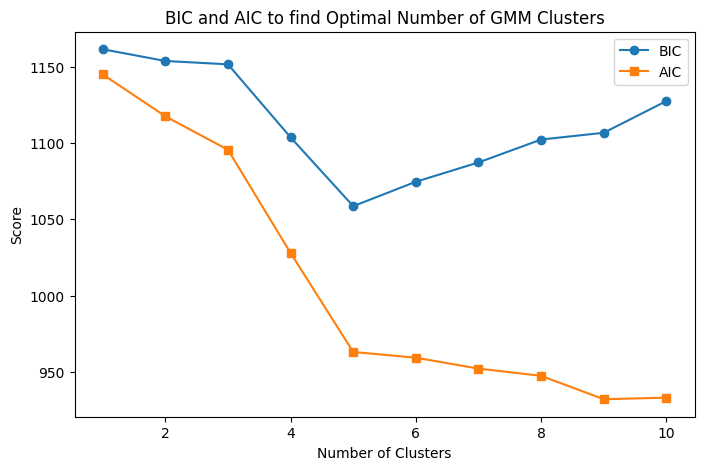

In [7]:
bic = []
aic = []
n_components_range = range(1, 11)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    aic.append(gmm.aic(X_scaled))

# Plot BIC and AIC to choose the best number of clusters
plt.figure(figsize=(8,5))
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.plot(n_components_range, aic, label='AIC', marker='s')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC and AIC to find Optimal Number of GMM Clusters')
plt.legend()
plt.show()

In [8]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = labels

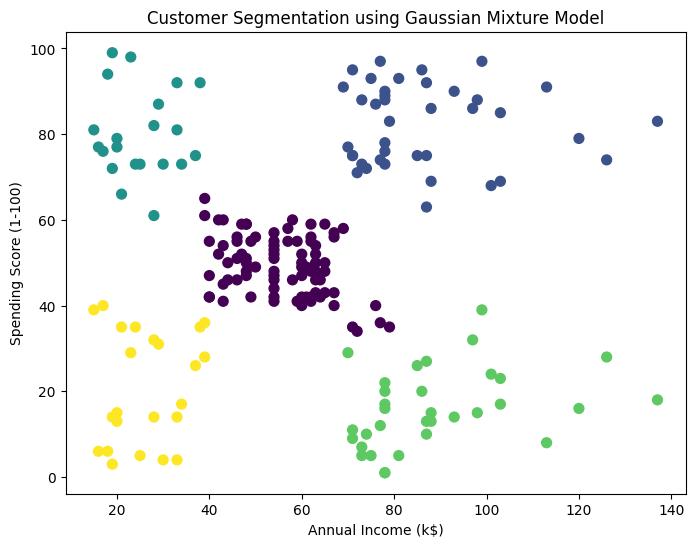

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(
    X['Annual Income (k$)'], 
    X['Spending Score (1-100)'], 
    c=labels, cmap='viridis', s=50
)
plt.title('Customer Segmentation using Gaussian Mixture Model')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [10]:
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Summary:")
print(cluster_summary)



Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.714286           55.642857               49.369048
1        32.692308           86.538462               82.128205
2        25.333333           25.095238               80.047619
3        40.454545           88.818182               16.000000
4        45.217391           26.304348               20.913043
